In [113]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from binance.client import Client
from binance.exceptions import BinanceAPIException
from secrets import secrets

BINANCE_API_KEY = secrets['BINANCE_API_KEY']
BINANCE_SECRET_KEY = secrets['BINANCE_SECRET_KEY']
BRIDGE = 'USDT'
COINS = ['BTC', 'ETH', 'LTC', 'XRP', 'BNB', 'ADA', 'BAT', 'FTM']

client = Client(BINANCE_API_KEY, BINANCE_SECRET_KEY)

In [82]:
symbol = 'BTC' + BRIDGE
btc_kline = client.get_klines(symbol=symbol, interval=Client.KLINE_INTERVAL_1MINUTE)

In [83]:
cols = ['OpenTime', 'Open', 'High', 'Low', 'Close', 'Volume', 'CloseTime', 'QuoteVolume', 'NumberTrades',
        'TakerBuyBaseVolume', 'TakerBuyQuoteVolume', 'Ignore']
num_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'QuoteVolume', 'TakerBuyBaseVolume', 'TakerBuyQuoteVolume']
df = pd.DataFrame(btc_kline, columns=cols)
df = df.drop(columns=['CloseTime', 'Ignore'])
df['OpenTime'] = pd.to_datetime(df['OpenTime'], unit='ms')
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df['NumberTrades'] = df['NumberTrades'].astype('int')
df.head()

,OpenTime,Open,High,Low,Close,Volume,QuoteVolume,NumberTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume
0,2021-02-27 01:05:00,47465.68,47499.98,47434.07,47440.23,33.801933,1.604418e+06,858,17.222394,8.175021e+05
1,2021-02-27 01:06:00,47440.23,47475.12,47410.00,47454.35,28.587374,1.356231e+06,804,10.109491,4.796204e+05
2,2021-02-27 01:07:00,47453.89,47670.39,47453.89,47620.57,121.024474,5.759868e+06,2551,65.197077,3.102712e+06
3,2021-02-27 01:08:00,47620.76,47775.00,47590.17,47727.12,105.055740,5.010145e+06,2705,62.829496,2.996726e+06
4,2021-02-27 01:09:00,47718.84,47744.99,47628.50,47700.43,51.259178,2.444597e+06,1470,26.092872,1.244355e+06


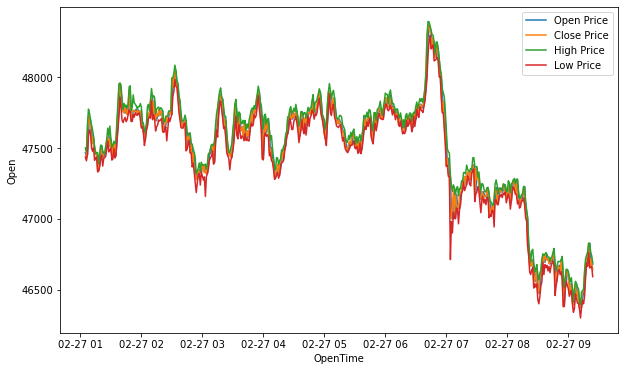

In [84]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=df, x='OpenTime', y='Open', label='Open Price')
ax = sns.lineplot(data=df, x='OpenTime', y='Close', label='Close Price')
ax = sns.lineplot(data=df, x='OpenTime', y='High', label='High Price')
ax = sns.lineplot(data=df, x='OpenTime', y='Low', label='Low Price');

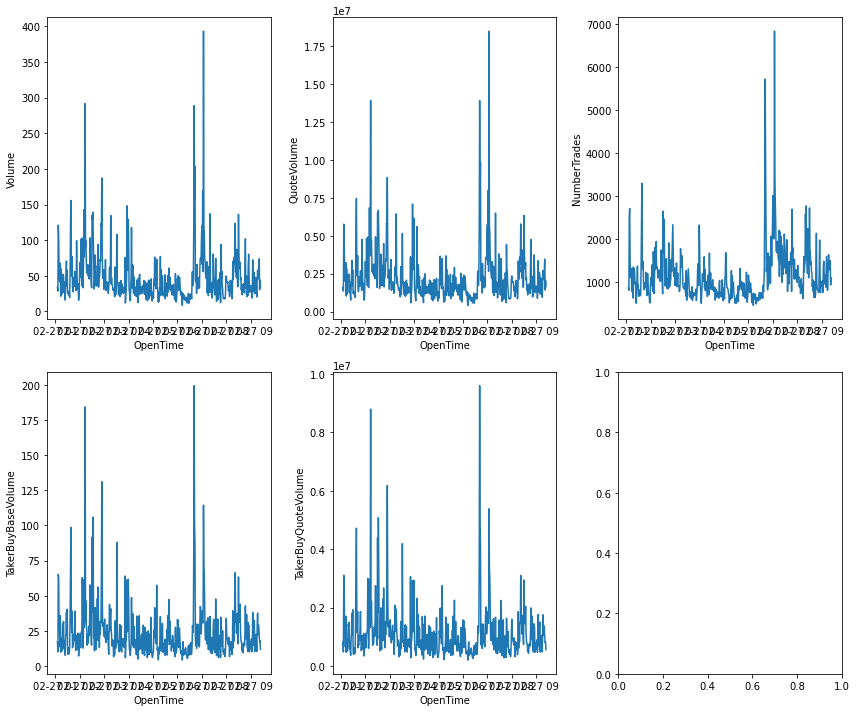

In [85]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(12,10))

for i, ax in enumerate(fig.axes):
    if i < 5:
        sns.lineplot(y=df.columns[5:][i], x='OpenTime', data=df, ax=ax)

fig.tight_layout();

In [86]:
df2 = df.copy()[['OpenTime', 'Open', 'High', 'Low', 'Volume', 'QuoteVolume', 'NumberTrades']]
df2['5minChange'] = (df2['Open'].shift(-1) - df2['Open']) * 100 / df2['Open']
df2['15minChange'] = (df2['Open'].shift(-3) - df2['Open']) * 100 / df2['Open']
df2.head()

,OpenTime,Open,High,Low,Volume,QuoteVolume,NumberTrades,5minChange,15minChange
0,2021-02-27 01:05:00,47465.68,47499.98,47434.07,33.801933,1.604418e+06,858,-0.053618,0.326720
1,2021-02-27 01:06:00,47440.23,47475.12,47410.00,28.587374,1.356231e+06,804,0.028794,0.587286
2,2021-02-27 01:07:00,47453.89,47670.39,47453.89,121.024474,5.759868e+06,2551,0.351647,0.515532
3,2021-02-27 01:08:00,47620.76,47775.00,47590.17,105.055740,5.010145e+06,2705,0.205961,0.018857
4,2021-02-27 01:09:00,47718.84,47744.99,47628.50,51.259178,2.444597e+06,1470,-0.042562,-0.384733


In [92]:
df2.describe()

,Open,High,Low,Volume,QuoteVolume,NumberTrades,5minChange,15minChange
count,500.000000,500.00000,500.000000,500.000000,5.000000e+02,500.000000,499.000000,497.000000
mean,47463.033120,47512.19254,47409.381760,46.869439,2.224990e+06,1140.462000,-0.003246,-0.009503
std,406.856348,405.97662,410.632305,36.113840,1.717594e+06,603.820804,0.147862,0.252278
min,46371.460000,46394.51000,46300.000000,8.424009,4.023051e+05,449.000000,-0.552189,-0.934952
25%,47266.947500,47302.49750,47189.115000,26.804823,1.270557e+06,768.750000,-0.103776,-0.159056
50%,47588.785000,47642.79500,47544.265000,37.668912,1.780577e+06,982.000000,0.006389,-0.005897
75%,47740.437500,47777.63250,47699.475000,52.748891,2.505163e+06,1323.000000,0.096951,0.134107
max,48368.410000,48394.00000,48293.900000,393.212103,1.848499e+07,6838.000000,0.533521,0.925301


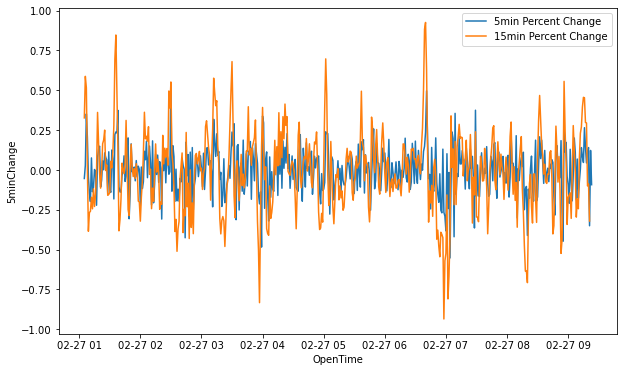

In [87]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=df2, x='OpenTime', y='5minChange', label='5min Percent Change')
ax = sns.lineplot(data=df2, x='OpenTime', y='15minChange', label='15min Percent Change');

In [104]:
df3 = df2.dropna()
X = df3.drop(columns=['OpenTime', 'QuoteVolume', '5minChange', '15minChange'])
y = df3['15minChange']

n_train_period = int(0.8 * len(X))
X_train, y_train = X[:n_train_period], y[:n_train_period]
X_test, y_test = X[n_train_period:], y[n_train_period:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((397, 5), (397,), (100, 5), (100,))

In [106]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)
# Reshape input to be 3D [samples, timesteps, features]
Xs_train = Xs_train.reshape((Xs_train.shape[0], 1, Xs_train.shape[1]))
Xs_test = Xs_test.reshape((Xs_test.shape[0], 1, Xs_test.shape[1]))
Xs_train.shape, Xs_test.shape

((397, 1, 5), (100, 1, 5))

Epoch 1/10
6/6 - 2s - loss: 0.1896 - val_loss: 0.1900
Epoch 2/10
6/6 - 0s - loss: 0.1877 - val_loss: 0.1920
Epoch 3/10
6/6 - 0s - loss: 0.1874 - val_loss: 0.1933
Epoch 4/10
6/6 - 0s - loss: 0.1868 - val_loss: 0.1940
Epoch 5/10
6/6 - 0s - loss: 0.1863 - val_loss: 0.1950
Epoch 6/10
6/6 - 0s - loss: 0.1860 - val_loss: 0.1968
Epoch 7/10
6/6 - 0s - loss: 0.1858 - val_loss: 0.1992
Epoch 8/10
6/6 - 0s - loss: 0.1855 - val_loss: 0.2011
Epoch 9/10
6/6 - 0s - loss: 0.1852 - val_loss: 0.2026
Epoch 10/10
6/6 - 0s - loss: 0.1850 - val_loss: 0.2042


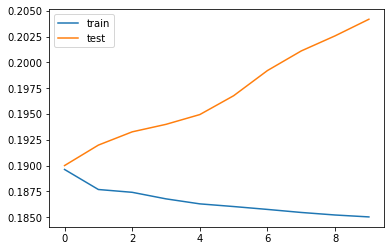

In [112]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, input_shape=(Xs_train.shape[1], Xs_test.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(Xs_train, y_train, epochs=10, batch_size=72, validation_data=(Xs_test, y_test), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
clien